In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
housing_pd=pd.read_excel(r'\Users\manan\Desktop\vrn trash\data science\project 1 -model to predict the house prices\Dataset 1.xlsx')
housing_pd.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


## Exploring Data

In [2]:
print('Shape of data frame:',housing_pd.shape)  # check the shape of data frame
print("Column's name :\n", housing_pd.columns )  #print the columns name

Shape of data frame: (18565, 10)
Column's name :
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [3]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


C:\Users\manan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


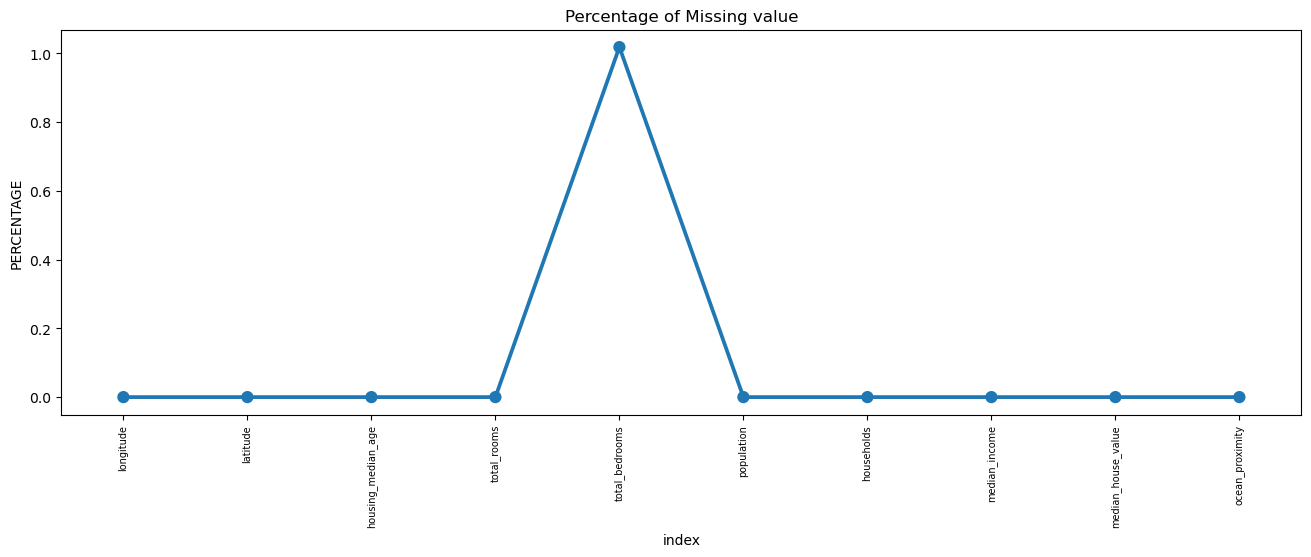

In [4]:
missing = pd.DataFrame((housing_pd.isnull().sum())*100/housing_pd.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentage of Missing value")
plt.ylabel("PERCENTAGE")
plt.show()
#for finding the percentage of missing value

In [5]:
#total_bedrooms has missing values 
housing_pd.dropna(inplace= True) #dropping the null values

In [6]:
# only 189 value out of 18565 are missing which is approx. 1.01% 
#therefore we are dropping the values

In [7]:
housing_pd.info()  # missing values eleminated 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18376 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18376 non-null  float64
 1   latitude            18376 non-null  float64
 2   housing_median_age  18376 non-null  int64  
 3   total_rooms         18376 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18376 non-null  int64  
 6   households          18376 non-null  int64  
 7   median_income       18376 non-null  float64
 8   median_house_value  18376 non-null  int64  
 9   ocean_proximity     18376 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


In [8]:
housing_pd.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18376.000000,18376.000000,18376.000000,18376.000000,18376.000000,18376.000000,18376.000000,18376.000000,18376.000000
mean,-119.571095,35.635164,28.605736,2635.302188,537.711199,1425.810786,499.375871,3.867986,206626.009850
std,2.003042,2.137485,12.570789,2200.534974,424.125849,1143.481721,384.514617,1.895500,115496.716039
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1444.000000,295.000000,786.000000,280.000000,2.560825,119200.000000
50%,-118.500000,34.260000,29.000000,2123.000000,434.000000,1165.500000,408.000000,3.536000,179400.000000
75%,-118.010000,37.720000,37.000000,3137.000000,646.000000,1722.000000,603.000000,4.743700,264325.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

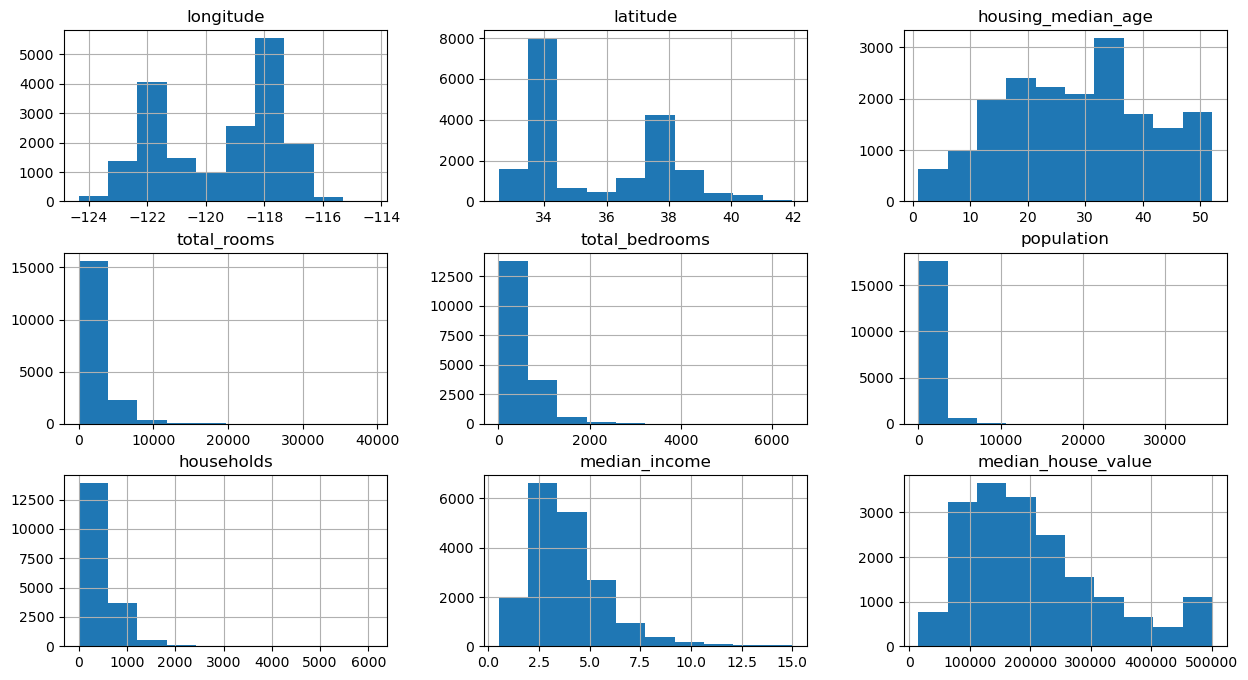

In [9]:
housing_pd.hist(figsize=(15,8))

In [10]:
# data is skewed in total_rooms, total_bedrooms ,population, households

# Pre-processing

In [11]:
housing_pd['total_rooms'] = np.log(housing_pd['total_rooms']+1) #using log-normal distribution 
housing_pd['total_bedrooms'] = np.log(housing_pd['total_bedrooms']+1)   
housing_pd['population'] = np.log(housing_pd['population']+1)
housing_pd['households'] = np.log(housing_pd['households']+1)

#for getting gaussian curve in total_rooms, total_bedrooms ,population, households.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

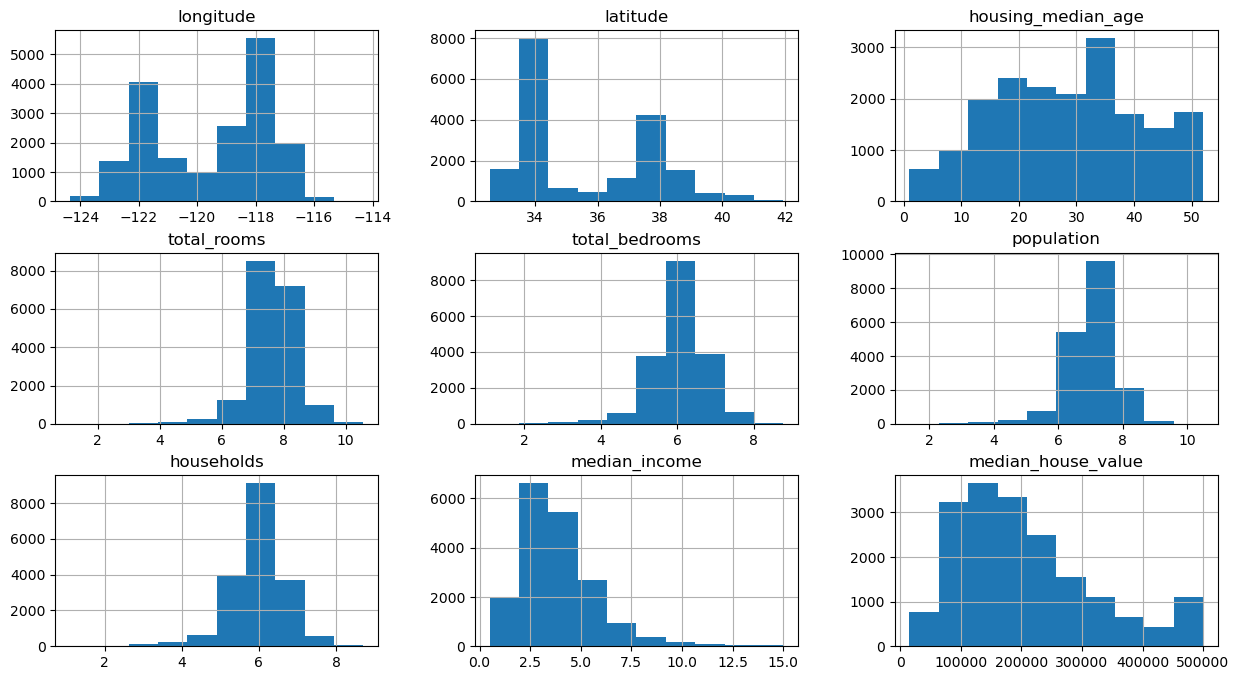

In [12]:
housing_pd.hist(figsize=(15,8))

In [13]:
#shuffeling the data set (randomising the data)
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10674,-120.46,39.83,18,8.133587,6.513230,7.357556,6.426488,2.2717,75900,INLAND
3663,-118.46,34.16,38,7.310550,5.707110,6.395262,5.638355,3.4698,265400,<1H OCEAN
16210,-121.91,37.23,22,7.869019,6.118097,7.123673,6.137727,6.0712,271800,<1H OCEAN
5444,-117.84,34.00,26,6.682109,4.770685,5.950643,4.744932,6.8758,253800,<1H OCEAN
15864,-121.91,37.26,32,8.290042,6.776507,7.595890,6.678342,3.5625,255200,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
11064,-116.89,33.93,29,8.422883,6.821107,7.822044,6.816736,2.0976,72600,INLAND
17462,-121.02,37.71,25,5.337538,3.737670,4.477337,3.784190,3.6023,131300,INLAND
5248,-118.31,34.19,13,8.243283,7.018402,7.594381,6.983790,2.0875,222700,<1H OCEAN
12290,-117.31,34.02,18,7.399398,5.616771,6.802395,5.655992,5.2139,129300,INLAND


In [14]:
housing_pd.ocean_proximity.value_counts() #we want to use ocean_proximity but first we have to convert it in numerical value

<1H OCEAN     8096
INLAND        5869
NEAR OCEAN    2372
NEAR BAY      2034
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
#creating dummy variables (one hot encoding)
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10674,0,1,0,0,0
3663,1,0,0,0,0
16210,1,0,0,0,0
5444,1,0,0,0,0
15864,1,0,0,0,0


In [16]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10674,-120.46,39.83,18,8.133587,6.513230,7.357556,6.426488,2.2717,75900
3663,-118.46,34.16,38,7.310550,5.707110,6.395262,5.638355,3.4698,265400
16210,-121.91,37.23,22,7.869019,6.118097,7.123673,6.137727,6.0712,271800
5444,-117.84,34.00,26,6.682109,4.770685,5.950643,4.744932,6.8758,253800
15864,-121.91,37.26,32,8.290042,6.776507,7.595890,6.678342,3.5625,255200


In [17]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])],axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10674,-120.46,39.83,18,8.133587,6.513230,7.357556,6.426488,2.2717,75900,0,1,0,0,0
3663,-118.46,34.16,38,7.310550,5.707110,6.395262,5.638355,3.4698,265400,1,0,0,0,0
16210,-121.91,37.23,22,7.869019,6.118097,7.123673,6.137727,6.0712,271800,1,0,0,0,0
5444,-117.84,34.00,26,6.682109,4.770685,5.950643,4.744932,6.8758,253800,1,0,0,0,0
15864,-121.91,37.26,32,8.290042,6.776507,7.595890,6.678342,3.5625,255200,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11064,-116.89,33.93,29,8.422883,6.821107,7.822044,6.816736,2.0976,72600,0,1,0,0,0
17462,-121.02,37.71,25,5.337538,3.737670,4.477337,3.784190,3.6023,131300,0,1,0,0,0
5248,-118.31,34.19,13,8.243283,7.018402,7.594381,6.983790,2.0875,222700,1,0,0,0,0
12290,-117.31,34.02,18,7.399398,5.616771,6.802395,5.655992,5.2139,129300,0,1,0,0,0


In [18]:
housing_pd_final= housing_pd_final[['longitude','latitude','housing_median_age',
                                   'total_rooms','total_bedrooms','population',
                                   'households','median_income',
                                   '<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN','median_house_value']]
housing_pd_final   #shifting the target variable in the end

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
10674,-120.46,39.83,18,8.133587,6.513230,7.357556,6.426488,2.2717,0,1,0,0,0,75900
3663,-118.46,34.16,38,7.310550,5.707110,6.395262,5.638355,3.4698,1,0,0,0,0,265400
16210,-121.91,37.23,22,7.869019,6.118097,7.123673,6.137727,6.0712,1,0,0,0,0,271800
5444,-117.84,34.00,26,6.682109,4.770685,5.950643,4.744932,6.8758,1,0,0,0,0,253800
15864,-121.91,37.26,32,8.290042,6.776507,7.595890,6.678342,3.5625,1,0,0,0,0,255200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11064,-116.89,33.93,29,8.422883,6.821107,7.822044,6.816736,2.0976,0,1,0,0,0,72600
17462,-121.02,37.71,25,5.337538,3.737670,4.477337,3.784190,3.6023,0,1,0,0,0,131300
5248,-118.31,34.19,13,8.243283,7.018402,7.594381,6.983790,2.0875,1,0,0,0,0,222700
12290,-117.31,34.02,18,7.399398,5.616771,6.802395,5.655992,5.2139,0,1,0,0,0,129300


<AxesSubplot:>

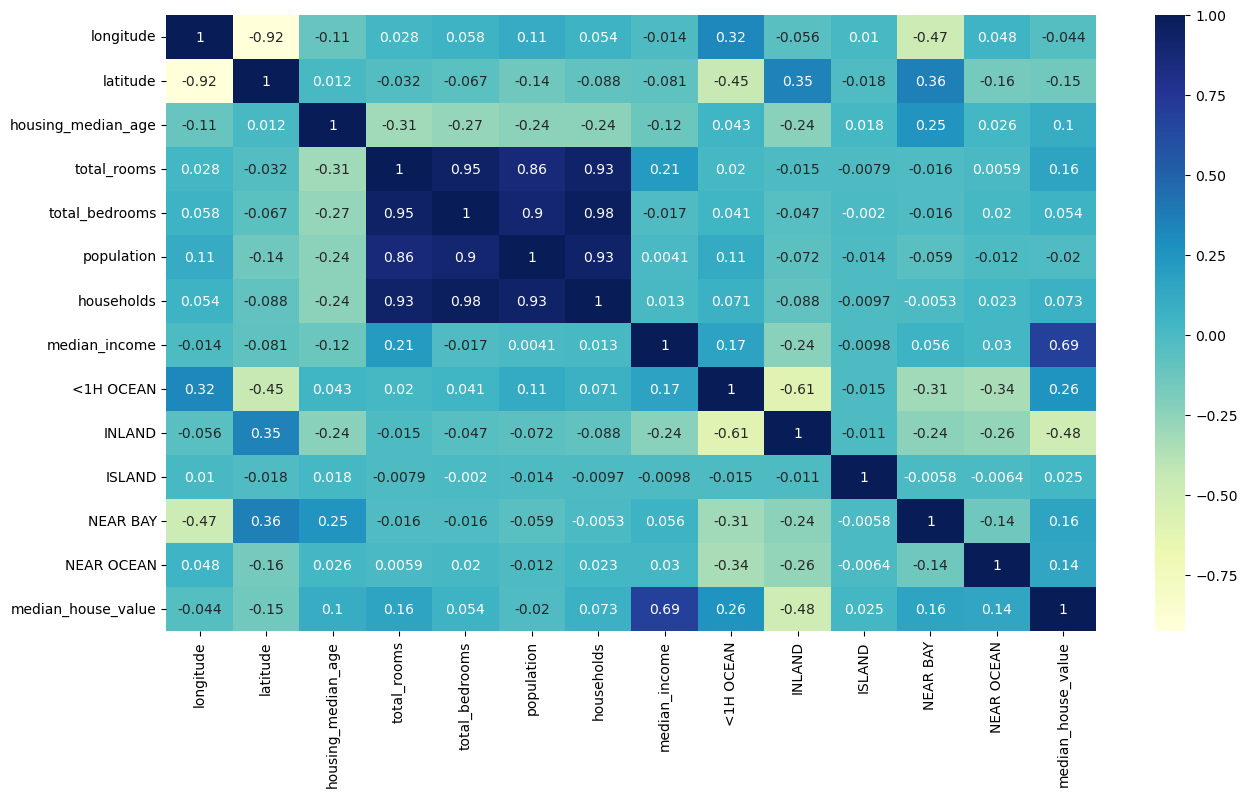

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(housing_pd_final.corr(), annot=True, cmap="YlGnBu")

In [20]:
# median_house_value is highly corelated with median income
#latitude and longitude is negatively corelated with median house value, which mean houses towards north are cheaper than south
#median_house_value is negatively corelated to INLAND, which means house price is lower for inland houses and 
# <1Hocean houses are most expensive
corr_matrix= housing_pd_final.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689302
<1H OCEAN             0.256238
total_rooms           0.159535
NEAR BAY              0.159242
NEAR OCEAN            0.144110
housing_median_age    0.104399
households            0.073263
total_bedrooms        0.053764
ISLAND                0.024828
population           -0.020374
longitude            -0.044422
latitude             -0.145687
INLAND               -0.484518
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

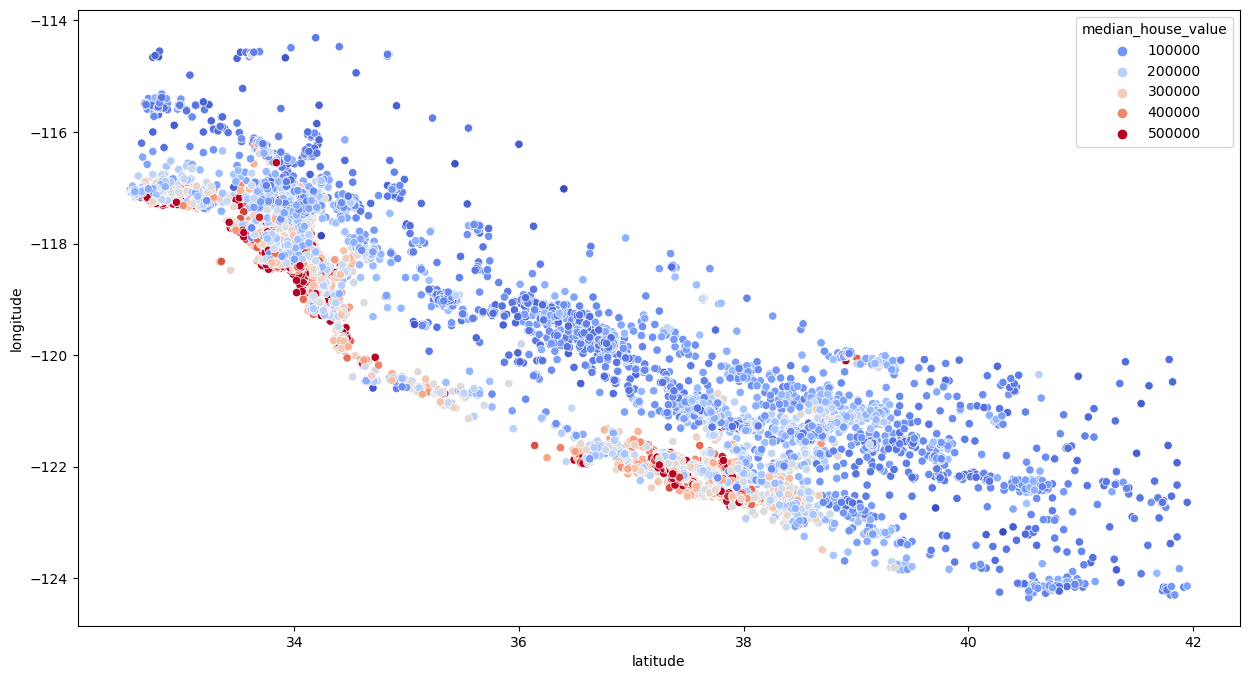

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude", data=housing_pd_final, hue="median_house_value", palette="coolwarm")

In [22]:
#may be the houses near the coast are more expensive

# Feature Engineering

In [23]:
fet_data = housing_pd_final.copy()
fet_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
10674,-120.46,39.83,18,8.133587,6.513230,7.357556,6.426488,2.2717,0,1,0,0,0,75900
3663,-118.46,34.16,38,7.310550,5.707110,6.395262,5.638355,3.4698,1,0,0,0,0,265400
16210,-121.91,37.23,22,7.869019,6.118097,7.123673,6.137727,6.0712,1,0,0,0,0,271800
5444,-117.84,34.00,26,6.682109,4.770685,5.950643,4.744932,6.8758,1,0,0,0,0,253800
15864,-121.91,37.26,32,8.290042,6.776507,7.595890,6.678342,3.5625,1,0,0,0,0,255200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11064,-116.89,33.93,29,8.422883,6.821107,7.822044,6.816736,2.0976,0,1,0,0,0,72600
17462,-121.02,37.71,25,5.337538,3.737670,4.477337,3.784190,3.6023,0,1,0,0,0,131300
5248,-118.31,34.19,13,8.243283,7.018402,7.594381,6.983790,2.0875,1,0,0,0,0,222700
12290,-117.31,34.02,18,7.399398,5.616771,6.802395,5.655992,5.2139,0,1,0,0,0,129300


### geopy - geocoders for finding address (dictionary)

In [24]:
from geopy.geocoders import  Nominatim
geolocator = Nominatim(user_agent= 'geoapiExercises')

In [25]:
geolocator.reverse('37.88'+','+'-122.23').raw['address'] #it gives the address 

{'leisure': 'Ecological Study Area',
 'road': 'Centennial Drive',
 'city': 'Oakland',
 'county': 'Alameda County',
 'state_district': 'CAL Fire Northern Region',
 'state': 'California',
 'ISO3166-2-lvl4': 'US-CA',
 'postcode': '94720',
 'country': 'United States',
 'country_code': 'us'}

In [26]:
def location(cord):
    Latitude = str(cord[0])
    Longitude = str(cord[1])
    
    location = geolocator.reverse(Latitude+','+Longitude).raw['address'] #raw returns a dictionary

    #if the values are missing , replace by empty string
    
    if location.get('leisure') is None:
        location['leisure']=None
        
    if location.get('road') is None:
        location['road']=None
        
    loc_update['leisure'].append( location['leisure'])
    loc_update['road'].append( location['road'])

In [27]:
#we can use different feature such as road and address for our model
#but it takes time to update all the address everytime so we are using latitude and longitude for now
# dictionary also has missing values

In [28]:

fet_data['bedroom_ratio'] = fet_data['total_bedrooms']/fet_data['total_rooms'] 
#how many rooms are bedrooms
fet_data['household_rooms'] = fet_data['total_rooms']/fet_data['households']
#how many rooms are bedrooms

<AxesSubplot:>

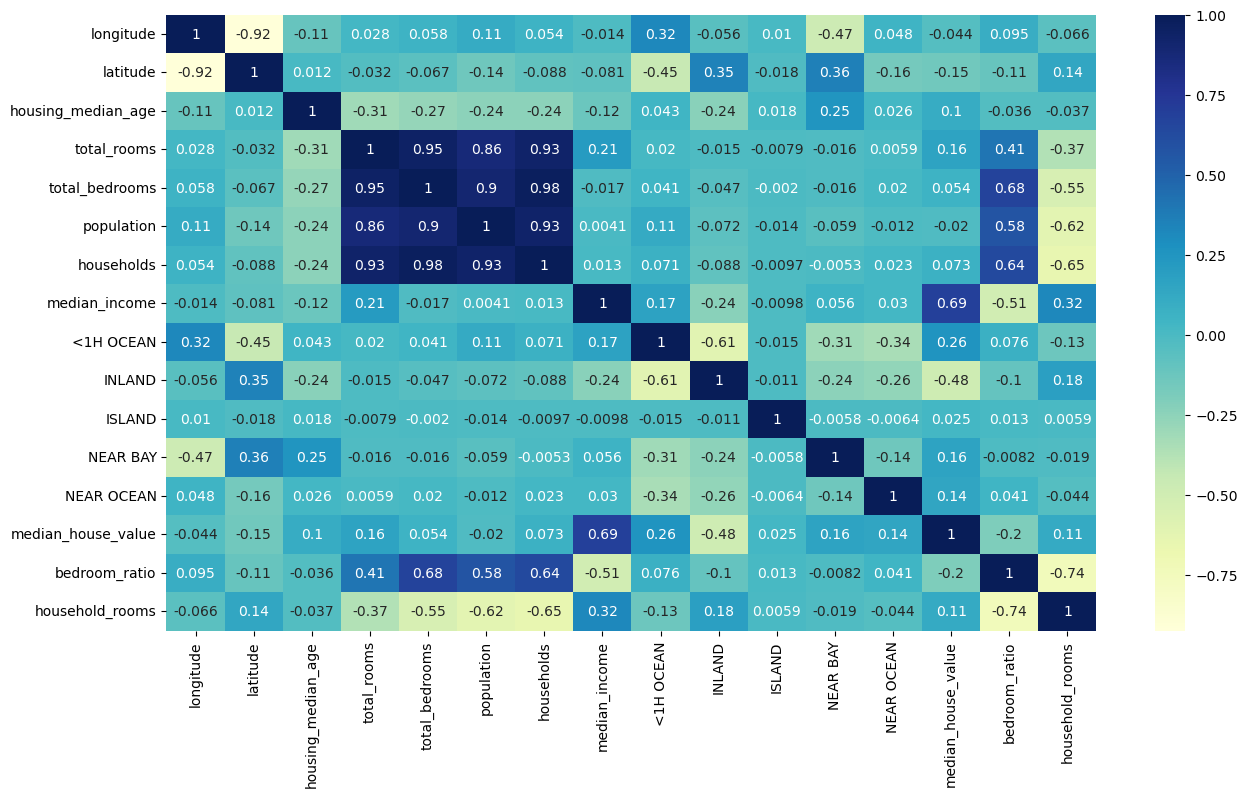

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(fet_data.corr(), annot=True, cmap="YlGnBu")

In [30]:
#as we can see that total_bedrooms are not co-related with median_house_value 
#but bedroom_ratio is negatively corelated with median_house_value 

In [31]:
corr_matrix= fet_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689302
<1H OCEAN             0.256238
total_rooms           0.159535
NEAR BAY              0.159242
NEAR OCEAN            0.144110
household_rooms       0.113014
housing_median_age    0.104399
households            0.073263
total_bedrooms        0.053764
ISLAND                0.024828
population           -0.020374
longitude            -0.044422
latitude             -0.145687
bedroom_ratio        -0.200326
INLAND               -0.484518
Name: median_house_value, dtype: float64

# Observations

### -> Data has some missing value -only 189 value out of 18565 are missing which is approx. 1.01% ,therefore we are dropping the values

### ->  Data is skewed in total_rooms, total_bedrooms ,population, households -  using log-normal distribution to help better identify the compount return that the price can expect to achieve over a period of time (for getting gaussian curve)

### -> Converting ocean_proximity in numerical value by creating dummy variables (one hot encoding)

### -> Corelations- median_house_value is highly corelated with median income -- median_house_value is negatively corelated to INLAND, which means house price is lower for inland houses and <1Hocean houses are more expensive -- latitude and longitude is negatively corelated with median house value, which mean houses towards north are cheaper than south, similarly,with east-west and vice-versa.

### -> May be the houses near the coast are more expensive

### -> Feature engineering - as we can see that total_bedrooms are not co-related with median_house_value but bedroom_ratio is negatively corelated with median_house_value 

# Splitting data in train, validation and test set

In [32]:
#spliting data into train , validation and test sets in ratio 70:15:15 
train_pd, val_pd, test_pd = housing_pd_final[:12865],housing_pd_final[12865:15620], housing_pd_final[15620:]
len(train_pd), len(val_pd), len(test_pd)

(12865, 2755, 2756)

In [33]:
#splitting data in x_train, y_train
x_train, y_train = train_pd.to_numpy()[:,:-1], train_pd.to_numpy()[:,-1]
x_val, y_val = val_pd.to_numpy()[:,:-1], val_pd.to_numpy()[:,-1]
x_test, y_test = test_pd.to_numpy()[:,:-1], test_pd.to_numpy()[:,-1]
x_train.shape, y_train.shape,x_val.shape, y_val.shape, x_test.shape, y_test.shape

((12865, 13), (12865,), (2755, 13), (2755,), (2756, 13), (2756,))

In [34]:
# Scalling of data
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

scaler = StandardScaler().fit(x_train[:,:8])

def preprocessor(x):
    A = np.copy(x)
    A[:, :8] = scaler.transform(A[:,:8])
    return A


x_train, x_val, x_test = preprocessor(x_train),  preprocessor(x_val),  preprocessor(x_test)
x_train.shape, y_train.shape,x_val.shape, y_val.shape, x_test.shape, y_test.shape

((12865, 13), (12865,), (2755, 13), (2755,), (2756, 13), (2756,))

In [35]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.438142,1.950776,-0.837858,0.678659,0.634739,0.457015,0.609649,-0.832122,0.0,1.0,0.0,0.0,0.0
1,0.557893,-0.694829,0.746108,-0.414399,-0.469153,-0.838351,-0.466447,-0.204112,1.0,0.0,0.0,0.0,0.0
2,-1.160267,0.737624,-0.521065,0.327292,0.093648,0.142179,0.215382,1.159467,1.0,0.0,0.0,0.0,0.0
3,0.866664,-0.769484,-0.204272,-1.249019,-1.751485,-1.436863,-1.686301,1.581215,1.0,0.0,0.0,0.0,0.0
4,-1.160267,0.751622,0.270918,0.886442,0.995267,0.777841,0.953523,-0.155521,1.0,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

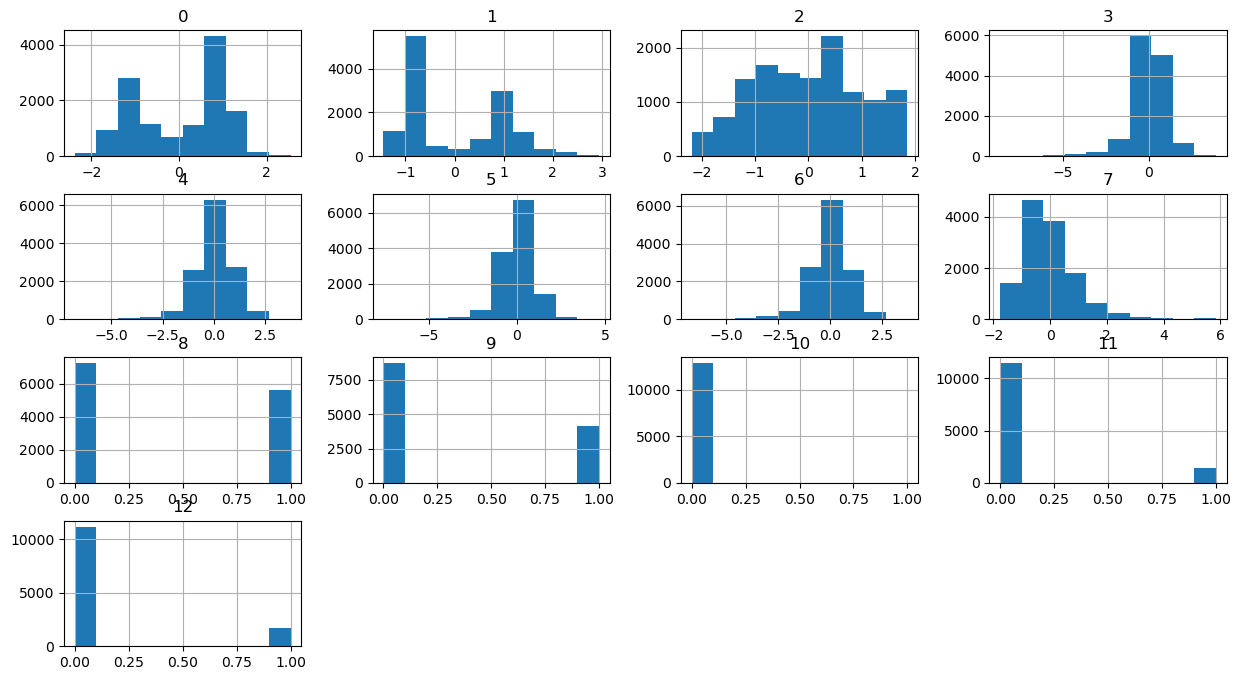

In [36]:
pd.DataFrame(x_train).hist(figsize=(15,8))

# Model Selection

# Linear Regression 

In [37]:
# ((y_hat(x) - y)^2)/n  finding mean square error
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

ln= LinearRegression().fit(x_train, y_train)
mse(ln.predict(x_train), y_train, squared=False), mse(ln.predict(x_val), y_val, squared=False)

(66205.0400517758, 67996.88505847761)

In [38]:
ln.score(x_train, y_train)

0.6701777484652226

In [39]:
ln.score(x_val, y_val)

0.6500092185357496

In [40]:
ln.score(x_test, y_test)

0.6861661984661933

# K nearest neighbours

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(x_train, y_train)
mse(knn.predict(x_train), y_train, squared=False), mse(knn.predict(x_val), y_val, squared=False)


(53546.107428466756, 61388.013851470794)

In [42]:
knn.score(x_train, y_train), knn.score(x_val, y_val), knn.score(x_test, y_test)

(0.7842485829848692, 0.7147368102211314, 0.741827644707151)

In [43]:
from sklearn.model_selection import GridSearchCV  ##Hyperparameter optimisation using RandomizedSearchCV

knear=  KNeighborsRegressor()

param_grid = {
    "n_neighbors": [3,10,30]}
grid_search = GridSearchCV(knear, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 10, 30]}, return_train_score=True,
             scoring='neg_mean_squared_error')

In [44]:
best_neighbor=grid_search.best_estimator_
best_neighbor

KNeighborsRegressor(n_neighbors=10)

In [45]:
best_neighbor.score(x_test, y_test)

0.741827644707151

# Random Forest regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(min_samples_split=4, n_estimators=30).fit(x_train, y_train)

mse(rfr.predict(x_train), y_train, squared=False), mse(rfr.predict(x_val), y_val, squared=False)


(22146.085925968942, 51763.67632727114)

In [47]:
rfr.score(x_train, y_train), rfr.score(x_val, y_val), rfr.score(x_test, y_test)

(0.9630944392837917, 0.7971715858125215, 0.8264574252169619)

In [48]:
from sklearn.model_selection import GridSearchCV  #Hyperparameter optimisation using RandomizedSearchCV

forest= RandomForestRegressor()

param_grid = {
    "n_estimators": [3,10,30],
    "max_depth": [None,4,8],
    "min_samples_split":[2,4]
}
grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
best_forest=grid_search.best_estimator_
best_forest

RandomForestRegressor(n_estimators=30)

In [50]:
best_forest.score(x_test, y_test)

0.8305350062675553

# Gradient Boosting Regressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr =  GradientBoostingRegressor(n_estimators=250).fit(x_train, y_train)

mse(gbr.predict(x_train), y_train, squared=False), mse(gbr.predict(x_val), y_val, squared=False)

(46525.89184888727, 53107.243859628)

In [52]:
gbr.score(x_train, y_train), gbr.score(x_val, y_val), gbr.score(x_test, y_test)

(0.8371126865359837, 0.7865057928683554, 0.8172908494830002)

In [53]:
from sklearn.model_selection import GridSearchCV#Hyperparameter optimisation using RandomizedSearchCV

gb= GradientBoostingRegressor()

param_grid = {
    "n_estimators": [200,250,350],
    
}
grid_search = GridSearchCV(gb, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [200, 250, 350]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
best_regressor=grid_search.best_estimator_
best_regressor

GradientBoostingRegressor(n_estimators=350)

In [55]:
best_regressor.score(x_test, y_test)

0.8250072313654335

# XG boost regressor

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

xgbr =  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=5, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None).fit(x_train, y_train)

mse(xgbr.predict(x_train), y_train, squared=False), mse(xgbr.predict(x_val), y_val, squared=False)

(44068.88422388084, 52344.69276409828)

In [57]:
xgbr.score(x_train, y_train), xgbr.score(x_val, y_val), xgbr.score(x_test, y_test)

(0.8538624048185602, 0.7925927757243001, 0.8228872986653505)

In [58]:
from sklearn.model_selection import GridSearchCV #grid search with cross validation (hyperparameter tuning)

xg=  XGBRegressor()

param_grid = {
     "learning_rate" : [0.01, 0.05, 0.10, ],
    "max_depth" : [ 3, 4, 5,],
    "min_child_weight" : [ 5, 7,9 ],
    "gamma" : [ 0.3, 0.4, 0.6 ],
    "colsample_bytree" : [0.3, 0.4, 0.5,]
    
}
grid_search = GridSearchCV(xg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=N

In [59]:
best_regressor=grid_search.best_estimator_
best_regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
best_regressor.score(x_test, y_test)

0.8228872986653505

# Neural networks

## Tensorflow and Keras

### Simple neural network

In [61]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [63]:
from tensorflow.keras.models import Sequential #for getting layers in-order
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint #for saving the best model
from tensorflow.keras.metrics import RootMeanSquaredError 
from tensorflow.keras.optimizers import Adam #optimizer

In [64]:
simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))  # adding layers
simple_nn.add(Dense(2, 'relu')) 
simple_nn.add(Dense(1,'linear'))

In [65]:
opt = Adam(learning_rate=0.1)  #Compiling with Adam optimizer and finding root-mean-square as metrics where loss=mse
cp = ModelCheckpoint('models/simple_nn', save_best_only= True) 
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])

In [66]:
x_train = x_train.astype('float32')  #converting variables into float
y_train = y_train.astype('float32')
x_val = x_val.astype('float32')
y_val = y_val.astype('float32')

simple_nn.fit(x_train, y_train, validation_data= (x_val, y_val), callbacks=[cp], epochs=50) #fitting the model


Epoch 1/50
401/403 [============================>.] - ETA: 0s - loss: 54137974784.0000 - root_mean_squared_error: 232675.6875INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 3s 6ms/step - loss: 54135386112.0000 - root_mean_squared_error: 232670.1250 - val_loss: 51601027072.0000 - val_root_mean_squared_error: 227158.5938
Epoch 2/50
399/403 [============================>.] - ETA: 0s - loss: 45973798912.0000 - root_mean_squared_error: 214415.0156INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 45988696064.0000 - root_mean_squared_error: 214449.7500 - val_loss: 41201610752.0000 - val_root_mean_squared_error: 202981.7969
Epoch 3/50
392/403 [============================>.] - ETA: 0s - loss: 35727273984.0000 - root_mean_squared_error: 189016.5938INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 35590881280.0000 - root_mean_squared_error: 188655.4531 - val_loss: 31496964096.0000 - val_root_mean_squared_error: 177473.8438
Epoch 4/50
393/403 [============================>.] - ETA: 0s - loss: 27055542272.0000 - root_mean_squared_error: 164485.6875INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 26965331968.0000 - root_mean_squared_error: 164211.2344 - val_loss: 23502188544.0000 - val_root_mean_squared_error: 153304.2344
Epoch 5/50
396/403 [============================>.] - ETA: 0s - loss: 19205023744.0000 - root_mean_squared_error: 138582.1875INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 19104481280.0000 - root_mean_squared_error: 138218.9688 - val_loss: 15705913344.0000 - val_root_mean_squared_error: 125323.2344
Epoch 6/50
397/403 [============================>.] - ETA: 0s - loss: 12007389184.0000 - root_mean_squared_error: 109578.2344INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 11967732736.0000 - root_mean_squared_error: 109397.1328 - val_loss: 9609289728.0000 - val_root_mean_squared_error: 98026.9844
Epoch 7/50
393/403 [============================>.] - ETA: 0s - loss: 7591464960.0000 - root_mean_squared_error: 87129.0156INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 7540700160.0000 - root_mean_squared_error: 86837.2031 - val_loss: 6546505216.0000 - val_root_mean_squared_error: 80910.4766
Epoch 8/50
384/403 [===========================>..] - ETA: 0s - loss: 5830061568.0000 - root_mean_squared_error: 76354.8438INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 5797743616.0000 - root_mean_squared_error: 76142.9141 - val_loss: 5535007744.0000 - val_root_mean_squared_error: 74397.6328
Epoch 9/50
400/403 [============================>.] - ETA: 0s - loss: 5206141952.0000 - root_mean_squared_error: 72153.6016INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 4ms/step - loss: 5203297792.0000 - root_mean_squared_error: 72133.8906 - val_loss: 5143255552.0000 - val_root_mean_squared_error: 71716.4922
Epoch 10/50
385/403 [===========================>..] - ETA: 0s - loss: 4966343168.0000 - root_mean_squared_error: 70472.2891INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4945133056.0000 - root_mean_squared_error: 70321.6406 - val_loss: 4977062912.0000 - val_root_mean_squared_error: 70548.3047
Epoch 11/50
394/403 [============================>.] - ETA: 0s - loss: 4798603264.0000 - root_mean_squared_error: 69271.9531INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4811334144.0000 - root_mean_squared_error: 69363.7812 - val_loss: 4905218560.0000 - val_root_mean_squared_error: 70037.2656
Epoch 12/50
399/403 [============================>.] - ETA: 0s - loss: 4729883136.0000 - root_mean_squared_error: 68774.1484INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4732465152.0000 - root_mean_squared_error: 68792.9141 - val_loss: 4848108032.0000 - val_root_mean_squared_error: 69628.3594
Epoch 13/50
398/403 [============================>.] - ETA: 0s - loss: 4669601280.0000 - root_mean_squared_error: 68334.4844INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4670647296.0000 - root_mean_squared_error: 68342.1328 - val_loss: 4800524288.0000 - val_root_mean_squared_error: 69285.8125
Epoch 14/50
388/403 [===========================>..] - ETA: 0s - loss: 4631862784.0000 - root_mean_squared_error: 68057.7891INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4616784896.0000 - root_mean_squared_error: 67946.9297 - val_loss: 4761671680.0000 - val_root_mean_squared_error: 69004.8672
Epoch 15/50
399/403 [============================>.] - ETA: 0s - loss: 4581337088.0000 - root_mean_squared_error: 67685.5781INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4571768320.0000 - root_mean_squared_error: 67614.8516 - val_loss: 4727258624.0000 - val_root_mean_squared_error: 68755.0625
Epoch 16/50
385/403 [===========================>..] - ETA: 0s - loss: 4520392192.0000 - root_mean_squared_error: 67233.8594INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4535334912.0000 - root_mean_squared_error: 67344.8984 - val_loss: 4707700736.0000 - val_root_mean_squared_error: 68612.6875
Epoch 17/50
398/403 [============================>.] - ETA: 0s - loss: 4492699136.0000 - root_mean_squared_error: 67027.6016INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4504314368.0000 - root_mean_squared_error: 67114.1875 - val_loss: 4691071488.0000 - val_root_mean_squared_error: 68491.3984
Epoch 18/50
402/403 [============================>.] - ETA: 0s - loss: 4483028480.0000 - root_mean_squared_error: 66955.4219INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 3s 6ms/step - loss: 4482825216.0000 - root_mean_squared_error: 66953.9062 - val_loss: 4678451712.0000 - val_root_mean_squared_error: 68399.2109
Epoch 19/50
403/403 [==============================] - ETA: 0s - loss: 4462806528.0000 - root_mean_squared_error: 66804.2422INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4462806528.0000 - root_mean_squared_error: 66804.2422 - val_loss: 4669099008.0000 - val_root_mean_squared_error: 68330.8047
Epoch 20/50
403/403 [==============================] - ETA: 0s - loss: 4447331840.0000 - root_mean_squared_error: 66688.3203INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4447331840.0000 - root_mean_squared_error: 66688.3203 - val_loss: 4645139456.0000 - val_root_mean_squared_error: 68155.2578
Epoch 21/50
383/403 [===========================>..] - ETA: 0s - loss: 4399497728.0000 - root_mean_squared_error: 66328.7109INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4433799680.0000 - root_mean_squared_error: 66586.7812 - val_loss: 4632454656.0000 - val_root_mean_squared_error: 68062.1406
Epoch 22/50
397/403 [============================>.] - ETA: 0s - loss: 4426747904.0000 - root_mean_squared_error: 66533.8125INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4421248512.0000 - root_mean_squared_error: 66492.4688 - val_loss: 4626297856.0000 - val_root_mean_squared_error: 68016.8906
Epoch 23/50
388/403 [===========================>..] - ETA: 0s - loss: 4402349568.0000 - root_mean_squared_error: 66350.2031INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4412586496.0000 - root_mean_squared_error: 66427.3047 - val_loss: 4620020736.0000 - val_root_mean_squared_error: 67970.7344
Epoch 24/50
391/403 [============================>.] - ETA: 0s - loss: 4396460544.0000 - root_mean_squared_error: 66305.8125INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4401637888.0000 - root_mean_squared_error: 66344.8438 - val_loss: 4603437568.0000 - val_root_mean_squared_error: 67848.6406
Epoch 25/50
389/403 [===========================>..] - ETA: 0s - loss: 4389908480.0000 - root_mean_squared_error: 66256.3828INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4395092480.0000 - root_mean_squared_error: 66295.4922 - val_loss: 4596065792.0000 - val_root_mean_squared_error: 67794.2891
Epoch 26/50
397/403 [============================>.] - ETA: 0s - loss: 4386035712.0000 - root_mean_squared_error: 66227.1562INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4387397632.0000 - root_mean_squared_error: 66237.4375 - val_loss: 4586267648.0000 - val_root_mean_squared_error: 67721.9844
Epoch 27/50
394/403 [============================>.] - ETA: 0s - loss: 4384515072.0000 - root_mean_squared_error: 66215.6719INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4382402048.0000 - root_mean_squared_error: 66199.7109 - val_loss: 4585523200.0000 - val_root_mean_squared_error: 67716.4922
Epoch 28/50
389/403 [===========================>..] - ETA: 0s - loss: 4378335744.0000 - root_mean_squared_error: 66168.9922INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4377058816.0000 - root_mean_squared_error: 66159.3438 - val_loss: 4578451456.0000 - val_root_mean_squared_error: 67664.2578
Epoch 29/50
401/403 [============================>.] - ETA: 0s - loss: 4372428288.0000 - root_mean_squared_error: 66124.3359INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4371435520.0000 - root_mean_squared_error: 66116.8359 - val_loss: 4573849088.0000 - val_root_mean_squared_error: 67630.2344
Epoch 30/50
403/403 [==============================] - 1s 4ms/step - loss: 4366628864.0000 - root_mean_squared_error: 66080.4688 - val_loss: 4578215936.0000 - val_root_mean_squared_error: 67662.5156
Epoch 31/50
392/403 [============================>.] - ETA: 0s - loss: 4345812992.0000 - root_mean_squared_error: 65922.7812INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4364669440.0000 - root_mean_squared_error: 66065.6484 - val_loss: 4565896192.0000 - val_root_mean_squared_error: 67571.4141
Epoch 32/50
390/403 [============================>.] - ETA: 0s - loss: 4369825792.0000 - root_mean_squared_error: 66104.6562INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 3s 6ms/step - loss: 4360029696.0000 - root_mean_squared_error: 66030.5234 - val_loss: 4556660736.0000 - val_root_mean_squared_error: 67503.0391
Epoch 33/50
403/403 [==============================] - 2s 4ms/step - loss: 4357476352.0000 - root_mean_squared_error: 66011.1797 - val_loss: 4560939520.0000 - val_root_mean_squared_error: 67534.7266
Epoch 34/50
400/403 [============================>.] - ETA: 0s - loss: 4360754176.0000 - root_mean_squared_error: 66036.0078INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4355404800.0000 - root_mean_squared_error: 65995.4922 - val_loss: 4552790528.0000 - val_root_mean_squared_error: 67474.3672
Epoch 35/50
401/403 [============================>.] - ETA: 0s - loss: 4354716672.0000 - root_mean_squared_error: 65990.2734INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4351808512.0000 - root_mean_squared_error: 65968.2422 - val_loss: 4541371392.0000 - val_root_mean_squared_error: 67389.6953
Epoch 36/50
403/403 [==============================] - 1s 3ms/step - loss: 4348308480.0000 - root_mean_squared_error: 65941.7031 - val_loss: 4542225408.0000 - val_root_mean_squared_error: 67396.0312
Epoch 37/50
403/403 [==============================] - 1s 3ms/step - loss: 4343964672.0000 - root_mean_squared_error: 65908.7578 - val_loss: 4559292416.0000 - val_root_mean_squared_error: 67522.5312
Epoch 38/50
403/403 [==============================] - 1s 3ms/step - loss: 4341110272.0000 - root_mean_squared_error: 65887.1016 - val_loss: 4547999744.0000 - val_root_mean_squared_error: 67438.8594
Epoch 39/50
381/403 [===========================>..] - ETA: 0s - loss: 4312449536.0000 - root_mean_squared_error: 65669.2422INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 4ms/step - loss: 4346191360.0000 - root_mean_squared_error: 65925.6484 - val_loss: 4539976704.0000 - val_root_mean_squared_error: 67379.3516
Epoch 40/50
390/403 [============================>.] - ETA: 0s - loss: 4347197952.0000 - root_mean_squared_error: 65933.2812INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4340490752.0000 - root_mean_squared_error: 65882.3984 - val_loss: 4534720512.0000 - val_root_mean_squared_error: 67340.3359
Epoch 41/50
403/403 [==============================] - 2s 4ms/step - loss: 4338654720.0000 - root_mean_squared_error: 65868.4688 - val_loss: 4539360256.0000 - val_root_mean_squared_error: 67374.7734
Epoch 42/50
402/403 [============================>.] - ETA: 0s - loss: 4338579456.0000 - root_mean_squared_error: 65867.8906INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 4338323456.0000 - root_mean_squared_error: 65865.9531 - val_loss: 4531887616.0000 - val_root_mean_squared_error: 67319.2969
Epoch 43/50
396/403 [============================>.] - ETA: 0s - loss: 4328961024.0000 - root_mean_squared_error: 65794.8438INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4336655360.0000 - root_mean_squared_error: 65853.2891 - val_loss: 4529954304.0000 - val_root_mean_squared_error: 67304.9375
Epoch 44/50
403/403 [==============================] - 1s 3ms/step - loss: 4335309312.0000 - root_mean_squared_error: 65843.0625 - val_loss: 4531691520.0000 - val_root_mean_squared_error: 67317.8359
Epoch 45/50
383/403 [===========================>..] - ETA: 0s - loss: 4335983616.0000 - root_mean_squared_error: 65848.1875INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4333956608.0000 - root_mean_squared_error: 65832.7891 - val_loss: 4529316864.0000 - val_root_mean_squared_error: 67300.2031
Epoch 46/50
401/403 [============================>.] - ETA: 0s - loss: 4339185152.0000 - root_mean_squared_error: 65872.4922INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4334219776.0000 - root_mean_squared_error: 65834.7891 - val_loss: 4522952704.0000 - val_root_mean_squared_error: 67252.8984
Epoch 47/50
403/403 [==============================] - 1s 3ms/step - loss: 4332393472.0000 - root_mean_squared_error: 65820.9219 - val_loss: 4524934656.0000 - val_root_mean_squared_error: 67267.6328
Epoch 48/50
403/403 [==============================] - 1s 3ms/step - loss: 4329927680.0000 - root_mean_squared_error: 65802.1875 - val_loss: 4532093440.0000 - val_root_mean_squared_error: 67320.8281
Epoch 49/50
390/403 [============================>.] - ETA: 0s - loss: 4323208192.0000 - root_mean_squared_error: 65751.1094INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 4330328064.0000 - root_mean_squared_error: 65805.2266 - val_loss: 4516604416.0000 - val_root_mean_squared_error: 67205.6875
Epoch 50/50
396/403 [============================>.] - ETA: 0s - loss: 4310765568.0000 - root_mean_squared_error: 65656.4219INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 4326334464.0000 - root_mean_squared_error: 65774.8750 - val_loss: 4515518976.0000 - val_root_mean_squared_error: 67197.6094


In [67]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')

mse(simple_nn.predict(x_train), y_train, squared=False), mse(simple_nn.predict(x_val), y_val, squared=False)


87/87 [==============================] - 0s 3ms/step


(65762.33, 67197.625)

### Medium Neural networks

In [68]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate=0.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only= True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=x_train, y=y_train, validation_data= (x_val, y_val), callbacks=[cp], epochs=100)



Epoch 1/100
391/403 [============================>.] - ETA: 0s - loss: 9883198464.0000 - root_mean_squared_error: 99414.2734  INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 4s 6ms/step - loss: 9729682432.0000 - root_mean_squared_error: 98639.1562 - val_loss: 4547170816.0000 - val_root_mean_squared_error: 67432.7109
Epoch 2/100
387/403 [===========================>..] - ETA: 0s - loss: 4266542592.0000 - root_mean_squared_error: 65318.7773INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 4299446272.0000 - root_mean_squared_error: 65570.1641 - val_loss: 4164784384.0000 - val_root_mean_squared_error: 64535.1406
Epoch 3/100
387/403 [===========================>..] - ETA: 0s - loss: 4125320448.0000 - root_mean_squared_error: 64228.6562INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 6ms/step - loss: 4139377664.0000 - root_mean_squared_error: 64337.9961 - val_loss: 4104467456.0000 - val_root_mean_squared_error: 64066.1172
Epoch 4/100
403/403 [==============================] - 2s 5ms/step - loss: 4041611520.0000 - root_mean_squared_error: 63573.6719 - val_loss: 4152464896.0000 - val_root_mean_squared_error: 64439.6211
Epoch 5/100
395/403 [============================>.] - ETA: 0s - loss: 4023942656.0000 - root_mean_squared_error: 63434.5547INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 4029793024.0000 - root_mean_squared_error: 63480.6523 - val_loss: 4017579264.0000 - val_root_mean_squared_error: 63384.3789
Epoch 6/100
395/403 [============================>.] - ETA: 0s - loss: 3948621312.0000 - root_mean_squared_error: 62838.0547INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3953817088.0000 - root_mean_squared_error: 62879.3867 - val_loss: 3968652800.0000 - val_root_mean_squared_error: 62997.2461
Epoch 7/100
403/403 [==============================] - 2s 4ms/step - loss: 3963184640.0000 - root_mean_squared_error: 62953.8281 - val_loss: 4004373248.0000 - val_root_mean_squared_error: 63280.1172
Epoch 8/100
402/403 [============================>.] - ETA: 0s - loss: 3928570880.0000 - root_mean_squared_error: 62678.3125INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 3928441856.0000 - root_mean_squared_error: 62677.2852 - val_loss: 3810724608.0000 - val_root_mean_squared_error: 61731.0664
Epoch 9/100
394/403 [============================>.] - ETA: 0s - loss: 3932185344.0000 - root_mean_squared_error: 62707.1406INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3919298816.0000 - root_mean_squared_error: 62604.3047 - val_loss: 3799691520.0000 - val_root_mean_squared_error: 61641.6367
Epoch 10/100
386/403 [===========================>..] - ETA: 0s - loss: 3899472128.0000 - root_mean_squared_error: 62445.7539INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 3902130688.0000 - root_mean_squared_error: 62467.0352 - val_loss: 3788662272.0000 - val_root_mean_squared_error: 61552.1094
Epoch 11/100
398/403 [============================>.] - ETA: 0s - loss: 3843732736.0000 - root_mean_squared_error: 61997.8438INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 3848303104.0000 - root_mean_squared_error: 62034.6914 - val_loss: 3769065472.0000 - val_root_mean_squared_error: 61392.7148
Epoch 12/100
385/403 [===========================>..] - ETA: 0s - loss: 3811805696.0000 - root_mean_squared_error: 61739.8242INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 6ms/step - loss: 3809143552.0000 - root_mean_squared_error: 61718.2578 - val_loss: 3737705216.0000 - val_root_mean_squared_error: 61136.7734
Epoch 13/100
394/403 [============================>.] - ETA: 0s - loss: 3843189760.0000 - root_mean_squared_error: 61993.4648INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 6ms/step - loss: 3850875648.0000 - root_mean_squared_error: 62055.4258 - val_loss: 3705758208.0000 - val_root_mean_squared_error: 60874.9375
Epoch 14/100
403/403 [==============================] - 1s 4ms/step - loss: 3804804608.0000 - root_mean_squared_error: 61683.0977 - val_loss: 3835025664.0000 - val_root_mean_squared_error: 61927.5859
Epoch 15/100
403/403 [==============================] - 1s 3ms/step - loss: 3787667200.0000 - root_mean_squared_error: 61544.0273 - val_loss: 3713091072.0000 - val_root_mean_squared_error: 60935.1367
Epoch 16/100
403/403 [==============================] - 1s 3ms/step - loss: 3773249280.0000 - root_mean_squared_error: 61426.7812 - val_loss: 3739036928.0000 - val_root_mean_squared_error: 61147.6641
Epoch 17/100
403/403 [==============================] - 1s 4ms/step - loss: 3775922176.0000 - root_mean_squared_error: 61448.5312 - val_loss: 3755237888.0000 - val_root_mean_squared_error: 61279.9961
Epoch 18/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 3801880576.0000 - root_mean_squared_error: 61659.3906 - val_loss: 3679400704.0000 - val_root_mean_squared_error: 60658.0625
Epoch 22/100
403/403 [==============================] - 1s 3ms/step - loss: 3770689792.0000 - root_mean_squared_error: 61405.9414 - val_loss: 3743200512.0000 - val_root_mean_squared_error: 61181.6992
Epoch 23/100
400/403 [============================>.] - ETA: 0s - loss: 3762768896.0000 - root_mean_squared_error: 61341.4141INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 3758282240.0000 - root_mean_squared_error: 61304.8320 - val_loss: 3655062784.0000 - val_root_mean_squared_error: 60457.1172
Epoch 24/100
403/403 [==============================] - ETA: 0s - loss: 3773314304.0000 - root_mean_squared_error: 61427.3086INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3773314304.0000 - root_mean_squared_error: 61427.3086 - val_loss: 3611598592.0000 - val_root_mean_squared_error: 60096.5781
Epoch 25/100
403/403 [==============================] - 2s 5ms/step - loss: 3786543360.0000 - root_mean_squared_error: 61534.8945 - val_loss: 3668169984.0000 - val_root_mean_squared_error: 60565.4180
Epoch 26/100
403/403 [==============================] - 2s 5ms/step - loss: 3749574144.0000 - root_mean_squared_error: 61233.7656 - val_loss: 3662545920.0000 - val_root_mean_squared_error: 60518.9727
Epoch 27/100
403/403 [==============================] - 2s 4ms/step - loss: 3767790592.0000 - root_mean_squared_error: 61382.3320 - val_loss: 3658256384.0000 - val_root_mean_squared_error: 60483.5234
Epoch 28/100
393/403 [============================>.] - ETA: 0s - loss: 3762451456.0000 - root_mean_squared_error: 61338.8242INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 4s 9ms/step - loss: 3742977024.0000 - root_mean_squared_error: 61179.8750 - val_loss: 3585059584.0000 - val_root_mean_squared_error: 59875.3672
Epoch 29/100
403/403 [==============================] - 2s 5ms/step - loss: 3727034624.0000 - root_mean_squared_error: 61049.4453 - val_loss: 4192367104.0000 - val_root_mean_squared_error: 64748.4922
Epoch 30/100
403/403 [==============================] - 1s 3ms/step - loss: 3797681920.0000 - root_mean_squared_error: 61625.3359 - val_loss: 3792658176.0000 - val_root_mean_squared_error: 61584.5625
Epoch 31/100
403/403 [==============================] - 1s 3ms/step - loss: 3753519360.0000 - root_mean_squared_error: 61265.9727 - val_loss: 3656468736.0000 - val_root_mean_squared_error: 60468.7422
Epoch 32/100
403/403 [==============================] - 1s 3ms/step - loss: 3713868800.0000 - root_mean_squared_error: 60941.5195 - val_loss: 3617200128.0000 - val_root_mean_squared_error: 60143.1641
Epoch 33/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 3517617152.0000 - root_mean_squared_error: 59309.5039 - val_loss: 3468686336.0000 - val_root_mean_squared_error: 58895.5547
Epoch 35/100
403/403 [==============================] - 2s 4ms/step - loss: 3423380736.0000 - root_mean_squared_error: 58509.6641 - val_loss: 3623317760.0000 - val_root_mean_squared_error: 60194.0000
Epoch 36/100
403/403 [==============================] - 2s 4ms/step - loss: 3423592448.0000 - root_mean_squared_error: 58511.4727 - val_loss: 3476034304.0000 - val_root_mean_squared_error: 58957.9023
Epoch 37/100
401/403 [============================>.] - ETA: 0s - loss: 3407767808.0000 - root_mean_squared_error: 58376.0898INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3412517888.0000 - root_mean_squared_error: 58416.7617 - val_loss: 3446394624.0000 - val_root_mean_squared_error: 58706.0000
Epoch 38/100
403/403 [==============================] - 2s 4ms/step - loss: 3393967616.0000 - root_mean_squared_error: 58257.7695 - val_loss: 3450498560.0000 - val_root_mean_squared_error: 58740.9453
Epoch 39/100
402/403 [============================>.] - ETA: 0s - loss: 3425455104.0000 - root_mean_squared_error: 58527.3867INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 3425244416.0000 - root_mean_squared_error: 58525.5859 - val_loss: 3421163520.0000 - val_root_mean_squared_error: 58490.7148
Epoch 40/100
403/403 [==============================] - 2s 4ms/step - loss: 3414741248.0000 - root_mean_squared_error: 58435.7891 - val_loss: 3448088320.0000 - val_root_mean_squared_error: 58720.4258
Epoch 41/100
403/403 [==============================] - 1s 3ms/step - loss: 3353064960.0000 - root_mean_squared_error: 57905.6562 - val_loss: 3437411840.0000 - val_root_mean_squared_error: 58629.4453
Epoch 42/100
401/403 [============================>.] - ETA: 0s - loss: 3347218944.0000 - root_mean_squared_error: 57855.1562INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 3347031040.0000 - root_mean_squared_error: 57853.5312 - val_loss: 3401690112.0000 - val_root_mean_squared_error: 58324.0078
Epoch 43/100
395/403 [============================>.] - ETA: 0s - loss: 3361322240.0000 - root_mean_squared_error: 57976.9102INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3356379904.0000 - root_mean_squared_error: 57934.2734 - val_loss: 3400331776.0000 - val_root_mean_squared_error: 58312.3633
Epoch 44/100
398/403 [============================>.] - ETA: 0s - loss: 3339191808.0000 - root_mean_squared_error: 57785.7422INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 3337936640.0000 - root_mean_squared_error: 57774.8789 - val_loss: 3387298304.0000 - val_root_mean_squared_error: 58200.5000
Epoch 45/100
403/403 [==============================] - 1s 3ms/step - loss: 3305818624.0000 - root_mean_squared_error: 57496.2500 - val_loss: 3640712192.0000 - val_root_mean_squared_error: 60338.3164
Epoch 46/100
403/403 [==============================] - 1s 3ms/step - loss: 3292153088.0000 - root_mean_squared_error: 57377.2891 - val_loss: 3416278528.0000 - val_root_mean_squared_error: 58448.9414
Epoch 47/100
403/403 [==============================] - 1s 3ms/step - loss: 3289155584.0000 - root_mean_squared_error: 57351.1602 - val_loss: 3390013184.0000 - val_root_mean_squared_error: 58223.8203
Epoch 48/100
396/403 [============================>.] - ETA: 0s - loss: 3263055104.0000 - root_mean_squared_error: 57123.1562INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 3267414528.0000 - root_mean_squared_error: 57161.3008 - val_loss: 3327774208.0000 - val_root_mean_squared_error: 57686.8633
Epoch 49/100
402/403 [============================>.] - ETA: 0s - loss: 3277089536.0000 - root_mean_squared_error: 57245.8711INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 6ms/step - loss: 3277220096.0000 - root_mean_squared_error: 57247.0078 - val_loss: 3293330176.0000 - val_root_mean_squared_error: 57387.5430
Epoch 50/100
403/403 [==============================] - 1s 3ms/step - loss: 3233542400.0000 - root_mean_squared_error: 56864.2461 - val_loss: 3451026176.0000 - val_root_mean_squared_error: 58745.4336
Epoch 51/100
403/403 [==============================] - 2s 4ms/step - loss: 3255978752.0000 - root_mean_squared_error: 57061.1836 - val_loss: 3391576320.0000 - val_root_mean_squared_error: 58237.2422
Epoch 52/100
403/403 [==============================] - 1s 4ms/step - loss: 3222539008.0000 - root_mean_squared_error: 56767.4102 - val_loss: 3301763840.0000 - val_root_mean_squared_error: 57460.9766
Epoch 53/100
398/403 [============================>.] - ETA: 0s - loss: 3220171008.0000 - root_mean_squared_error: 56746.5508INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 3224759552.0000 - root_mean_squared_error: 56786.9648 - val_loss: 3288113664.0000 - val_root_mean_squared_error: 57342.0742
Epoch 54/100
401/403 [============================>.] - ETA: 0s - loss: 3306589184.0000 - root_mean_squared_error: 57502.9492INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 3306180352.0000 - root_mean_squared_error: 57499.3945 - val_loss: 3236867328.0000 - val_root_mean_squared_error: 56893.4727
Epoch 55/100
403/403 [==============================] - 1s 3ms/step - loss: 3183802880.0000 - root_mean_squared_error: 56425.1953 - val_loss: 3253698304.0000 - val_root_mean_squared_error: 57041.1992
Epoch 56/100
403/403 [==============================] - ETA: 0s - loss: 3165259776.0000 - root_mean_squared_error: 56260.6406INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 3165259776.0000 - root_mean_squared_error: 56260.6406 - val_loss: 3227446784.0000 - val_root_mean_squared_error: 56810.6211
Epoch 57/100
402/403 [============================>.] - ETA: 0s - loss: 3161958656.0000 - root_mean_squared_error: 56231.2969INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 3161800448.0000 - root_mean_squared_error: 56229.8906 - val_loss: 3169218304.0000 - val_root_mean_squared_error: 56295.8125
Epoch 58/100
403/403 [==============================] - 1s 3ms/step - loss: 3116313344.0000 - root_mean_squared_error: 55823.9492 - val_loss: 3207911424.0000 - val_root_mean_squared_error: 56638.4258
Epoch 59/100
403/403 [==============================] - 2s 4ms/step - loss: 3108016128.0000 - root_mean_squared_error: 55749.5859 - val_loss: 3324666112.0000 - val_root_mean_squared_error: 57659.9180
Epoch 60/100
403/403 [==============================] - 2s 5ms/step - loss: 3085275648.0000 - root_mean_squared_error: 55545.2578 - val_loss: 3217826560.0000 - val_root_mean_squared_error: 56725.8906
Epoch 61/100
403/403 [==============================] - 2s 5ms/step - loss: 3115437824.0000 - root_mean_squared_error: 55816.1055 - val_loss: 3183851520.0000 - val_root_mean_squared_error: 56425.6289
Epoch 62/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 3086535424.0000 - root_mean_squared_error: 55556.5977 - val_loss: 3129796352.0000 - val_root_mean_squared_error: 55944.5820
Epoch 64/100
403/403 [==============================] - 1s 3ms/step - loss: 3059684352.0000 - root_mean_squared_error: 55314.4141 - val_loss: 3205224192.0000 - val_root_mean_squared_error: 56614.6992
Epoch 65/100
403/403 [==============================] - 1s 3ms/step - loss: 3062784256.0000 - root_mean_squared_error: 55342.4258 - val_loss: 3248378368.0000 - val_root_mean_squared_error: 56994.5469
Epoch 66/100
386/403 [===========================>..] - ETA: 0s - loss: 3041750272.0000 - root_mean_squared_error: 55152.0664INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 3048297216.0000 - root_mean_squared_error: 55211.3867 - val_loss: 3109085184.0000 - val_root_mean_squared_error: 55759.1719
Epoch 67/100
394/403 [============================>.] - ETA: 0s - loss: 3036429824.0000 - root_mean_squared_error: 55103.8086INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 3037264640.0000 - root_mean_squared_error: 55111.3828 - val_loss: 3106386176.0000 - val_root_mean_squared_error: 55734.9648
Epoch 68/100
403/403 [==============================] - 1s 3ms/step - loss: 3067053056.0000 - root_mean_squared_error: 55380.9805 - val_loss: 3206197504.0000 - val_root_mean_squared_error: 56623.2930
Epoch 69/100
403/403 [==============================] - 2s 4ms/step - loss: 3027467264.0000 - root_mean_squared_error: 55022.4258 - val_loss: 3160510464.0000 - val_root_mean_squared_error: 56218.4180
Epoch 70/100
403/403 [==============================] - 1s 4ms/step - loss: 3035376896.0000 - root_mean_squared_error: 55094.2539 - val_loss: 3266731776.0000 - val_root_mean_squared_error: 57155.3320
Epoch 71/100
403/403 [==============================] - 1s 4ms/step - loss: 3029868288.0000 - root_mean_squared_error: 55044.2383 - val_loss: 3178315776.0000 - val_root_mean_squared_error: 56376.5547
Epoch 72/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 2990883072.0000 - root_mean_squared_error: 54688.9648 - val_loss: 3099274496.0000 - val_root_mean_squared_error: 55671.1289
Epoch 77/100
392/403 [============================>.] - ETA: 0s - loss: 3004774400.0000 - root_mean_squared_error: 54815.8242INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 3009459200.0000 - root_mean_squared_error: 54858.5391 - val_loss: 3040656896.0000 - val_root_mean_squared_error: 55142.1523
Epoch 78/100
403/403 [==============================] - 1s 3ms/step - loss: 2958307072.0000 - root_mean_squared_error: 54390.3203 - val_loss: 3059680512.0000 - val_root_mean_squared_error: 55314.3789
Epoch 79/100
403/403 [==============================] - 1s 4ms/step - loss: 2973607424.0000 - root_mean_squared_error: 54530.7930 - val_loss: 3257006848.0000 - val_root_mean_squared_error: 57070.1914
Epoch 80/100
400/403 [============================>.] - ETA: 0s - loss: 2972645120.0000 - root_mean_squared_error: 54521.9688INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 2976221952.0000 - root_mean_squared_error: 54554.7617 - val_loss: 2990212096.0000 - val_root_mean_squared_error: 54682.8320
Epoch 81/100
403/403 [==============================] - 2s 4ms/step - loss: 2956017664.0000 - root_mean_squared_error: 54369.2695 - val_loss: 3012282880.0000 - val_root_mean_squared_error: 54884.2695
Epoch 82/100
403/403 [==============================] - 1s 3ms/step - loss: 2963023872.0000 - root_mean_squared_error: 54433.6641 - val_loss: 3043916032.0000 - val_root_mean_squared_error: 55171.6953
Epoch 83/100
403/403 [==============================] - 1s 3ms/step - loss: 2910777856.0000 - root_mean_squared_error: 53951.6250 - val_loss: 3086768640.0000 - val_root_mean_squared_error: 55558.6953
Epoch 84/100
403/403 [==============================] - 1s 3ms/step - loss: 2936004608.0000 - root_mean_squared_error: 54184.9102 - val_loss: 3096427520.0000 - val_root_mean_squared_error: 55645.5508
Epoch 85/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


403/403 [==============================] - 2s 5ms/step - loss: 2905446400.0000 - root_mean_squared_error: 53902.1914 - val_loss: 2977189376.0000 - val_root_mean_squared_error: 54563.6250
Epoch 87/100
403/403 [==============================] - 1s 4ms/step - loss: 2901971712.0000 - root_mean_squared_error: 53869.9531 - val_loss: 3233839872.0000 - val_root_mean_squared_error: 56866.8594
Epoch 88/100
403/403 [==============================] - 1s 3ms/step - loss: 2894243584.0000 - root_mean_squared_error: 53798.1758 - val_loss: 3186805248.0000 - val_root_mean_squared_error: 56451.7969
Epoch 89/100
403/403 [==============================] - 1s 3ms/step - loss: 2914817536.0000 - root_mean_squared_error: 53989.0508 - val_loss: 3061189632.0000 - val_root_mean_squared_error: 55328.0195
Epoch 90/100
403/403 [==============================] - 1s 3ms/step - loss: 2930979072.0000 - root_mean_squared_error: 54138.5156 - val_loss: 3170156800.0000 - val_root_mean_squared_error: 56304.1445
Epoch 91/100


In [69]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(x_train), y_train, squared=False), mse(medium_nn.predict(x_val), y_val, squared=False)


87/87 [==============================] - 0s 2ms/step


(53159.887, 54563.63)

### Large Neural Networks

In [70]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(32, 'relu'))

large_nn.add(Dense(16, 'relu'))
large_nn.add(Dense(1,'linear'))

opt = Adam()
cp = ModelCheckpoint('models/large_nn', save_best_only= True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=x_train, y=y_train, validation_data= (x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
394/403 [============================>.] - ETA: 0s - loss: 36581158912.0000 - root_mean_squared_error: 191262.0156INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 5s 8ms/step - loss: 35998785536.0000 - root_mean_squared_error: 189733.4531 - val_loss: 7578639872.0000 - val_root_mean_squared_error: 87055.3828
Epoch 2/100
402/403 [============================>.] - ETA: 0s - loss: 5876570624.0000 - root_mean_squared_error: 76658.7969INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 5876235776.0000 - root_mean_squared_error: 76656.6094 - val_loss: 5264099328.0000 - val_root_mean_squared_error: 72554.1094
Epoch 3/100
385/403 [===========================>..] - ETA: 0s - loss: 4965639680.0000 - root_mean_squared_error: 70467.2969INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 4953245696.0000 - root_mean_squared_error: 70379.2969 - val_loss: 4791873024.0000 - val_root_mean_squared_error: 69223.3594
Epoch 4/100
401/403 [============================>.] - ETA: 0s - loss: 4624102400.0000 - root_mean_squared_error: 68000.7500INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 4623732224.0000 - root_mean_squared_error: 67998.0312 - val_loss: 4585270784.0000 - val_root_mean_squared_error: 67714.6250
Epoch 5/100
392/403 [============================>.] - ETA: 0s - loss: 4447047168.0000 - root_mean_squared_error: 66686.1875INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 4442945024.0000 - root_mean_squared_error: 66655.4219 - val_loss: 4525478400.0000 - val_root_mean_squared_error: 67271.6797
Epoch 6/100
396/403 [============================>.] - ETA: 0s - loss: 4350511616.0000 - root_mean_squared_error: 65958.4062INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 4342890496.0000 - root_mean_squared_error: 65900.6094 - val_loss: 4330363904.0000 - val_root_mean_squared_error: 65805.5000
Epoch 7/100
399/403 [============================>.] - ETA: 0s - loss: 4270990336.0000 - root_mean_squared_error: 65352.8125INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 4258759936.0000 - root_mean_squared_error: 65259.1758 - val_loss: 4272738560.0000 - val_root_mean_squared_error: 65366.1875
Epoch 8/100
401/403 [============================>.] - ETA: 0s - loss: 4209492224.0000 - root_mean_squared_error: 64880.6016INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 4203940096.0000 - root_mean_squared_error: 64837.7969 - val_loss: 4246567936.0000 - val_root_mean_squared_error: 65165.6953
Epoch 9/100
392/403 [============================>.] - ETA: 0s - loss: 4160229376.0000 - root_mean_squared_error: 64499.8398INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 4152598272.0000 - root_mean_squared_error: 64440.6562 - val_loss: 4161175808.0000 - val_root_mean_squared_error: 64507.1758
Epoch 10/100
403/403 [==============================] - 2s 4ms/step - loss: 4116131584.0000 - root_mean_squared_error: 64157.0859 - val_loss: 4224270848.0000 - val_root_mean_squared_error: 64994.3906
Epoch 11/100
392/403 [============================>.] - ETA: 0s - loss: 4088313856.0000 - root_mean_squared_error: 63939.9219INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 4089887744.0000 - root_mean_squared_error: 63952.2305 - val_loss: 4136069888.0000 - val_root_mean_squared_error: 64312.2852
Epoch 12/100
399/403 [============================>.] - ETA: 0s - loss: 4051145728.0000 - root_mean_squared_error: 63648.6133INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 4067949312.0000 - root_mean_squared_error: 63780.4766 - val_loss: 4085881344.0000 - val_root_mean_squared_error: 63920.8984
Epoch 13/100
402/403 [============================>.] - ETA: 0s - loss: 4035498496.0000 - root_mean_squared_error: 63525.5742INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 4035185152.0000 - root_mean_squared_error: 63523.1055 - val_loss: 4027853312.0000 - val_root_mean_squared_error: 63465.3711
Epoch 14/100
401/403 [============================>.] - ETA: 0s - loss: 4013562880.0000 - root_mean_squared_error: 63352.6875INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 4s 9ms/step - loss: 4018720000.0000 - root_mean_squared_error: 63393.3750 - val_loss: 4009225472.0000 - val_root_mean_squared_error: 63318.4453
Epoch 15/100
403/403 [==============================] - 2s 5ms/step - loss: 4002048000.0000 - root_mean_squared_error: 63261.7422 - val_loss: 4020090368.0000 - val_root_mean_squared_error: 63404.1836
Epoch 16/100
403/403 [==============================] - 1s 3ms/step - loss: 3983634176.0000 - root_mean_squared_error: 63116.0391 - val_loss: 4032221952.0000 - val_root_mean_squared_error: 63499.7773
Epoch 17/100
403/403 [==============================] - 2s 4ms/step - loss: 3966386176.0000 - root_mean_squared_error: 62979.2500 - val_loss: 4012981504.0000 - val_root_mean_squared_error: 63348.0977
Epoch 18/100
403/403 [==============================] - 2s 4ms/step - loss: 3956016384.0000 - root_mean_squared_error: 62896.8711 - val_loss: 4107417088.0000 - val_root_mean_squared_error: 64089.1328
Epoch 19/100


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 4s 9ms/step - loss: 3941918464.0000 - root_mean_squared_error: 62784.6992 - val_loss: 3990358016.0000 - val_root_mean_squared_error: 63169.2812
Epoch 20/100
399/403 [============================>.] - ETA: 0s - loss: 3954744832.0000 - root_mean_squared_error: 62886.7617INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 5s 12ms/step - loss: 3955416576.0000 - root_mean_squared_error: 62892.1016 - val_loss: 3903117312.0000 - val_root_mean_squared_error: 62474.9336
Epoch 21/100
392/403 [============================>.] - ETA: 0s - loss: 3897996288.0000 - root_mean_squared_error: 62433.9336INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 4s 10ms/step - loss: 3912003328.0000 - root_mean_squared_error: 62546.0078 - val_loss: 3892098048.0000 - val_root_mean_squared_error: 62386.6836
Epoch 22/100
393/403 [============================>.] - ETA: 0s - loss: 3931834880.0000 - root_mean_squared_error: 62704.3438INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 5s 12ms/step - loss: 3914638080.0000 - root_mean_squared_error: 62567.0703 - val_loss: 3888026880.0000 - val_root_mean_squared_error: 62354.0430
Epoch 23/100
403/403 [==============================] - ETA: 0s - loss: 3893754368.0000 - root_mean_squared_error: 62399.9531INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3893754368.0000 - root_mean_squared_error: 62399.9531 - val_loss: 3870517504.0000 - val_root_mean_squared_error: 62213.4844
Epoch 24/100
403/403 [==============================] - 2s 4ms/step - loss: 3896434432.0000 - root_mean_squared_error: 62421.4258 - val_loss: 3925195264.0000 - val_root_mean_squared_error: 62651.3789
Epoch 25/100
403/403 [==============================] - 2s 5ms/step - loss: 3883167488.0000 - root_mean_squared_error: 62315.0664 - val_loss: 3945849344.0000 - val_root_mean_squared_error: 62815.9961
Epoch 26/100
403/403 [==============================] - 2s 4ms/step - loss: 3877733376.0000 - root_mean_squared_error: 62271.4492 - val_loss: 3899857664.0000 - val_root_mean_squared_error: 62448.8398
Epoch 27/100
403/403 [==============================] - 2s 4ms/step - loss: 3871696384.0000 - root_mean_squared_error: 62222.9570 - val_loss: 3905793792.0000 - val_root_mean_squared_error: 62496.3516
Epoch 28/100


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 4s 11ms/step - loss: 3863189760.0000 - root_mean_squared_error: 62154.5625 - val_loss: 3869384704.0000 - val_root_mean_squared_error: 62204.3789
Epoch 29/100
401/403 [============================>.] - ETA: 0s - loss: 3865059328.0000 - root_mean_squared_error: 62169.6016INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3860961024.0000 - root_mean_squared_error: 62136.6328 - val_loss: 3830604288.0000 - val_root_mean_squared_error: 61891.8750
Epoch 30/100
394/403 [============================>.] - ETA: 0s - loss: 3847791872.0000 - root_mean_squared_error: 62030.5703INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 4s 9ms/step - loss: 3841092352.0000 - root_mean_squared_error: 61976.5469 - val_loss: 3812285440.0000 - val_root_mean_squared_error: 61743.7070
Epoch 31/100
403/403 [==============================] - 2s 5ms/step - loss: 3839731712.0000 - root_mean_squared_error: 61965.5703 - val_loss: 3980027648.0000 - val_root_mean_squared_error: 63087.4609
Epoch 32/100
403/403 [==============================] - 2s 4ms/step - loss: 3832059648.0000 - root_mean_squared_error: 61903.6328 - val_loss: 3821173504.0000 - val_root_mean_squared_error: 61815.6406
Epoch 33/100
403/403 [==============================] - 1s 3ms/step - loss: 3823904512.0000 - root_mean_squared_error: 61837.7266 - val_loss: 3836820736.0000 - val_root_mean_squared_error: 61942.0742
Epoch 34/100
402/403 [============================>.] - ETA: 0s - loss: 3818721024.0000 - root_mean_squared_error: 61795.8008INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3818554112.0000 - root_mean_squared_error: 61794.4492 - val_loss: 3794986752.0000 - val_root_mean_squared_error: 61603.4648
Epoch 35/100
395/403 [============================>.] - ETA: 0s - loss: 3810731264.0000 - root_mean_squared_error: 61731.1211INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3814606848.0000 - root_mean_squared_error: 61762.5039 - val_loss: 3773434112.0000 - val_root_mean_squared_error: 61428.2852
Epoch 36/100
397/403 [============================>.] - ETA: 0s - loss: 3820671232.0000 - root_mean_squared_error: 61811.5781INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 3809426688.0000 - root_mean_squared_error: 61720.5547 - val_loss: 3769019904.0000 - val_root_mean_squared_error: 61392.3438
Epoch 37/100
403/403 [==============================] - 1s 4ms/step - loss: 3794713088.0000 - root_mean_squared_error: 61601.2422 - val_loss: 3847386368.0000 - val_root_mean_squared_error: 62027.3047
Epoch 38/100
403/403 [==============================] - 1s 3ms/step - loss: 3800456704.0000 - root_mean_squared_error: 61647.8438 - val_loss: 3876386304.0000 - val_root_mean_squared_error: 62260.6328
Epoch 39/100
392/403 [============================>.] - ETA: 0s - loss: 3796755200.0000 - root_mean_squared_error: 61617.8164INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3796274944.0000 - root_mean_squared_error: 61613.9180 - val_loss: 3728461056.0000 - val_root_mean_squared_error: 61061.1250
Epoch 40/100
403/403 [==============================] - 2s 5ms/step - loss: 3776342016.0000 - root_mean_squared_error: 61451.9492 - val_loss: 3740641280.0000 - val_root_mean_squared_error: 61160.7812
Epoch 41/100
403/403 [==============================] - 1s 4ms/step - loss: 3776074240.0000 - root_mean_squared_error: 61449.7695 - val_loss: 3761955072.0000 - val_root_mean_squared_error: 61334.7773
Epoch 42/100
394/403 [============================>.] - ETA: 0s - loss: 3763914496.0000 - root_mean_squared_error: 61350.7500INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3766775808.0000 - root_mean_squared_error: 61374.0664 - val_loss: 3716954880.0000 - val_root_mean_squared_error: 60966.8359
Epoch 43/100
403/403 [==============================] - 1s 4ms/step - loss: 3762786560.0000 - root_mean_squared_error: 61341.5547 - val_loss: 3757889024.0000 - val_root_mean_squared_error: 61301.6250
Epoch 44/100
403/403 [==============================] - 1s 3ms/step - loss: 3765141760.0000 - root_mean_squared_error: 61360.7500 - val_loss: 3747676928.0000 - val_root_mean_squared_error: 61218.2734
Epoch 45/100
403/403 [==============================] - 1s 4ms/step - loss: 3760984576.0000 - root_mean_squared_error: 61326.8672 - val_loss: 3719523328.0000 - val_root_mean_squared_error: 60987.8945
Epoch 46/100
392/403 [============================>.] - ETA: 0s - loss: 3773101824.0000 - root_mean_squared_error: 61425.5781INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 4s 9ms/step - loss: 3749361920.0000 - root_mean_squared_error: 61232.0352 - val_loss: 3697890560.0000 - val_root_mean_squared_error: 60810.2852
Epoch 47/100
403/403 [==============================] - 2s 4ms/step - loss: 3748621056.0000 - root_mean_squared_error: 61225.9844 - val_loss: 3743622656.0000 - val_root_mean_squared_error: 61185.1523
Epoch 48/100
403/403 [==============================] - 1s 3ms/step - loss: 3753201408.0000 - root_mean_squared_error: 61263.3789 - val_loss: 3713132800.0000 - val_root_mean_squared_error: 60935.4805
Epoch 49/100
403/403 [==============================] - 2s 4ms/step - loss: 3735040256.0000 - root_mean_squared_error: 61114.9766 - val_loss: 3721182208.0000 - val_root_mean_squared_error: 61001.4922
Epoch 50/100
403/403 [==============================] - 2s 4ms/step - loss: 3733853184.0000 - root_mean_squared_error: 61105.2617 - val_loss: 3698632448.0000 - val_root_mean_squared_error: 60816.3828
Epoch 51/100


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3725987584.0000 - root_mean_squared_error: 61040.8672 - val_loss: 3663399424.0000 - val_root_mean_squared_error: 60526.0234
Epoch 52/100
403/403 [==============================] - 2s 5ms/step - loss: 3721119232.0000 - root_mean_squared_error: 61000.9766 - val_loss: 3715269120.0000 - val_root_mean_squared_error: 60953.0078
Epoch 53/100
394/403 [============================>.] - ETA: 0s - loss: 3699077376.0000 - root_mean_squared_error: 60820.0391INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3719618560.0000 - root_mean_squared_error: 60988.6758 - val_loss: 3650674688.0000 - val_root_mean_squared_error: 60420.8125
Epoch 54/100
403/403 [==============================] - 2s 4ms/step - loss: 3718292992.0000 - root_mean_squared_error: 60977.8086 - val_loss: 3742424832.0000 - val_root_mean_squared_error: 61175.3594
Epoch 55/100
403/403 [==============================] - 1s 3ms/step - loss: 3717669376.0000 - root_mean_squared_error: 60972.6953 - val_loss: 3688149248.0000 - val_root_mean_squared_error: 60730.1328
Epoch 56/100
403/403 [==============================] - 1s 3ms/step - loss: 3714050048.0000 - root_mean_squared_error: 60943.0078 - val_loss: 3757271296.0000 - val_root_mean_squared_error: 61296.5859
Epoch 57/100
403/403 [==============================] - 2s 4ms/step - loss: 3706150144.0000 - root_mean_squared_error: 60878.1562 - val_loss: 3685858048.0000 - val_root_mean_squared_error: 60711.2695
Epoch 58/100


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 3712229888.0000 - root_mean_squared_error: 60928.0703 - val_loss: 3648732416.0000 - val_root_mean_squared_error: 60404.7383
Epoch 60/100
403/403 [==============================] - 1s 3ms/step - loss: 3713361152.0000 - root_mean_squared_error: 60937.3555 - val_loss: 3717748736.0000 - val_root_mean_squared_error: 60973.3438
Epoch 61/100
403/403 [==============================] - 1s 3ms/step - loss: 3701786880.0000 - root_mean_squared_error: 60842.3125 - val_loss: 3709399808.0000 - val_root_mean_squared_error: 60904.8438
Epoch 62/100
403/403 [==============================] - 1s 3ms/step - loss: 3690585088.0000 - root_mean_squared_error: 60750.1875 - val_loss: 3665146880.0000 - val_root_mean_squared_error: 60540.4570
Epoch 63/100
403/403 [==============================] - 2s 4ms/step - loss: 3704336384.0000 - root_mean_squared_error: 60863.2578 - val_loss: 3678524160.0000 - val_root_mean_squared_error: 60650.8398
Epoch 64/100


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 3706023168.0000 - root_mean_squared_error: 60877.1172 - val_loss: 3630133248.0000 - val_root_mean_squared_error: 60250.5859
Epoch 65/100
403/403 [==============================] - 2s 4ms/step - loss: 3699395072.0000 - root_mean_squared_error: 60822.6523 - val_loss: 3700667648.0000 - val_root_mean_squared_error: 60833.1133
Epoch 66/100
403/403 [==============================] - 2s 5ms/step - loss: 3698145280.0000 - root_mean_squared_error: 60812.3789 - val_loss: 3699218176.0000 - val_root_mean_squared_error: 60821.1992
Epoch 67/100
400/403 [============================>.] - ETA: 0s - loss: 3687229440.0000 - root_mean_squared_error: 60722.5625INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 4s 10ms/step - loss: 3680348160.0000 - root_mean_squared_error: 60665.8750 - val_loss: 3628249088.0000 - val_root_mean_squared_error: 60234.9492
Epoch 68/100
403/403 [==============================] - 2s 4ms/step - loss: 3688688640.0000 - root_mean_squared_error: 60734.5742 - val_loss: 3644804096.0000 - val_root_mean_squared_error: 60372.2148
Epoch 69/100
403/403 [==============================] - 1s 3ms/step - loss: 3697377536.0000 - root_mean_squared_error: 60806.0664 - val_loss: 3636616448.0000 - val_root_mean_squared_error: 60304.3633
Epoch 70/100
384/403 [===========================>..] - ETA: 0s - loss: 3680878336.0000 - root_mean_squared_error: 60670.2422INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 6ms/step - loss: 3687071744.0000 - root_mean_squared_error: 60721.2617 - val_loss: 3620814080.0000 - val_root_mean_squared_error: 60173.1992
Epoch 71/100
403/403 [==============================] - 2s 4ms/step - loss: 3678123520.0000 - root_mean_squared_error: 60647.5352 - val_loss: 3667900160.0000 - val_root_mean_squared_error: 60563.1914
Epoch 72/100
403/403 [==============================] - 1s 3ms/step - loss: 3689544448.0000 - root_mean_squared_error: 60741.6211 - val_loss: 3672822272.0000 - val_root_mean_squared_error: 60603.8125
Epoch 73/100
403/403 [==============================] - 1s 4ms/step - loss: 3684928256.0000 - root_mean_squared_error: 60703.6094 - val_loss: 3624992000.0000 - val_root_mean_squared_error: 60207.9062
Epoch 74/100
403/403 [==============================] - 2s 4ms/step - loss: 3670586880.0000 - root_mean_squared_error: 60585.3672 - val_loss: 3631605504.0000 - val_root_mean_squared_error: 60262.8047
Epoch 75/100


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3669450752.0000 - root_mean_squared_error: 60575.9922 - val_loss: 3618416128.0000 - val_root_mean_squared_error: 60153.2734
Epoch 76/100
403/403 [==============================] - 2s 4ms/step - loss: 3670262272.0000 - root_mean_squared_error: 60582.6914 - val_loss: 3632429312.0000 - val_root_mean_squared_error: 60269.6367
Epoch 77/100
403/403 [==============================] - 1s 3ms/step - loss: 3677518848.0000 - root_mean_squared_error: 60642.5508 - val_loss: 3649095936.0000 - val_root_mean_squared_error: 60407.7461
Epoch 78/100
400/403 [============================>.] - ETA: 0s - loss: 3653666304.0000 - root_mean_squared_error: 60445.5664INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 2s 6ms/step - loss: 3655400960.0000 - root_mean_squared_error: 60459.9102 - val_loss: 3588319488.0000 - val_root_mean_squared_error: 59902.5820
Epoch 79/100
403/403 [==============================] - 1s 4ms/step - loss: 3661470464.0000 - root_mean_squared_error: 60510.0859 - val_loss: 3743586816.0000 - val_root_mean_squared_error: 61184.8594
Epoch 80/100
403/403 [==============================] - 1s 3ms/step - loss: 3661350144.0000 - root_mean_squared_error: 60509.0898 - val_loss: 3679282688.0000 - val_root_mean_squared_error: 60657.0898
Epoch 81/100
403/403 [==============================] - 1s 3ms/step - loss: 3660761088.0000 - root_mean_squared_error: 60504.2227 - val_loss: 3630286592.0000 - val_root_mean_squared_error: 60251.8594
Epoch 82/100
403/403 [==============================] - 1s 3ms/step - loss: 3654064384.0000 - root_mean_squared_error: 60448.8594 - val_loss: 3648257280.0000 - val_root_mean_squared_error: 60400.8047
Epoch 83/100


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 3630917888.0000 - root_mean_squared_error: 60257.0977 - val_loss: 3576824320.0000 - val_root_mean_squared_error: 59806.5586
Epoch 90/100
403/403 [==============================] - 1s 4ms/step - loss: 3628296704.0000 - root_mean_squared_error: 60235.3438 - val_loss: 3589283584.0000 - val_root_mean_squared_error: 59910.6289
Epoch 91/100
385/403 [===========================>..] - ETA: 0s - loss: 3636333312.0000 - root_mean_squared_error: 60302.0156INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 6ms/step - loss: 3622930688.0000 - root_mean_squared_error: 60190.7852 - val_loss: 3555359232.0000 - val_root_mean_squared_error: 59626.8320
Epoch 92/100
403/403 [==============================] - 1s 3ms/step - loss: 3608862976.0000 - root_mean_squared_error: 60073.8125 - val_loss: 3579050496.0000 - val_root_mean_squared_error: 59825.1680
Epoch 93/100
403/403 [==============================] - 1s 3ms/step - loss: 3596846080.0000 - root_mean_squared_error: 59973.7109 - val_loss: 3593789952.0000 - val_root_mean_squared_error: 59948.2266
Epoch 94/100
399/403 [============================>.] - ETA: 0s - loss: 3594372352.0000 - root_mean_squared_error: 59953.0859INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3587480320.0000 - root_mean_squared_error: 59895.5781 - val_loss: 3533452544.0000 - val_root_mean_squared_error: 59442.8516
Epoch 95/100
403/403 [==============================] - 1s 4ms/step - loss: 3578164480.0000 - root_mean_squared_error: 59817.7617 - val_loss: 3556947968.0000 - val_root_mean_squared_error: 59640.1523
Epoch 96/100
403/403 [==============================] - ETA: 0s - loss: 3559167744.0000 - root_mean_squared_error: 59658.7617INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 7ms/step - loss: 3559167744.0000 - root_mean_squared_error: 59658.7617 - val_loss: 3527174144.0000 - val_root_mean_squared_error: 59390.0156
Epoch 97/100
403/403 [==============================] - 1s 3ms/step - loss: 3546952960.0000 - root_mean_squared_error: 59556.3008 - val_loss: 3550638848.0000 - val_root_mean_squared_error: 59587.2383
Epoch 98/100
403/403 [==============================] - 1s 3ms/step - loss: 3536798720.0000 - root_mean_squared_error: 59470.9922 - val_loss: 3530638080.0000 - val_root_mean_squared_error: 59419.1719
Epoch 99/100
394/403 [============================>.] - ETA: 0s - loss: 3542173440.0000 - root_mean_squared_error: 59516.1602INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 6ms/step - loss: 3528648448.0000 - root_mean_squared_error: 59402.4297 - val_loss: 3508981248.0000 - val_root_mean_squared_error: 59236.6562
Epoch 100/100
401/403 [============================>.] - ETA: 0s - loss: 3520721152.0000 - root_mean_squared_error: 59335.6641INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


403/403 [==============================] - 3s 8ms/step - loss: 3524588032.0000 - root_mean_squared_error: 59368.2422 - val_loss: 3506926080.0000 - val_root_mean_squared_error: 59219.3047


In [71]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(x_train), y_train, squared=False), mse(large_nn.predict(x_val), y_val, squared=False)

87/87 [==============================] - 0s 2ms/step


(59197.004, 59219.305)